## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Homework 6: due February 23, 2018

Please enter all answers within this notebook unless otherwise specified. As usual, don't forget to cite sources and collaborators.

Through this problem set, use the SageMath 8.1 kernel except as specified.

This homework consists of 5 problems, each of equal value.

### Problem 1: The birthday paradox (and comedy)

Grading criteria: correctness of code and thoroughness of explanations.

1a. A well-known statement of mathematical folklore asserts that if you choose $N$ people at random, then the probability that two of them have the same birthday exceeds 50% as soon as $N \geq 23$. This is sometimes called the *birthday paradox* not because of any logical inconsistency, but simply because people find this counterintuitive; a more accepted terminology is the [*birthday problem*](https://en.wikipedia.org/wiki/Birthday_problem).

Write a function that, given $N$, computes this probability. For simplicity, you may assume that every year consists of 365 days (i.e., ignore leap years) and that birthdays are distributed uniformly at random.

Sources:

https://en.wikipedia.org/wiki/Birthday_problem

https://en.wikipedia.org/wiki/Birthday_attack

https://www.cs.drexel.edu/~jjohnson/2017-18/fall/cs303/lectures/Collision.pdf

In [44]:
def birthday(n):
    if (n<0):
        raise ValueError
    elif n>365:
        return(1.0)
    else:
        prob_diff=factorial(365)/(365^n*factorial(365-n))
        return(1.0-prob_diff)

1b. Verify numerically that the probability exceeds 0.5 if and only if $N \geq 23$.

The probability that there is a shared birthday is clearly a monotone increasing function with $N$. That is, as we put more and more people into the room, the likelihood of a repeated birthday strictly increases. Thus it suffices to show that the probability with 22 people in the room is less than 50%, and the probability with 23 people in the room is greater than 50%.

In [47]:
print('With 22 people in the room: '+str(birthday(22)))
print('With 23 people in the room: '+str(birthday(23)))

With 22 people in the room: 0.475695307662550
With 23 people in the room: 0.507297234323985


1c. If a year were to consist of $M$ days, how would the crossover value depend (asympotically) on $N$? Why?

Here are some heuristics (which could be fleshed out to a full proof) to show that the crossover value will be roughly $\sqrt{M}$. For a year with $M$ days, let $p(N)$ denote the probability that with $N$ people in a room there will be a shared birthday. Then we have an exact formula
$$p(N)=1-(1-1/M)(1-2/M)\dots(1-(N-1)/M)$$
We want $p(N)\approx 1/2$, so it suffices to require $(1-1/M)(1-2/M)\dots(1-(N-1)/M\approx 1/2$. But now if $M$ is large, and $N$ is small compared to $M$, we will have 
$$
(1-1/M)(1-2/M)\dots(1-(N-1)/M)\approx (1-1/d)(1-1/d)\dots(1-1/d)=(1-1/d)^{n(n-1)/2}.
$$
Recalling our approximation to $e$ as a limit (https://en.wikipedia.org/wiki/List_of_representations_of_e), this gives 
$$
(1-1/M)(1-2/M)\dots(1-(N-1)/M)\approx (1-1/M)^{N(N-1)/2}\approx e^{-N(N-1)/(2M)}
$$
Recall we want this to be close to $1/2$, so we need 
$$
 e^{-N(N-1)/(2M)}\approx 1/2,
$$
and after taking logarithms this gives 
$$
N(N-1)/2M\approx \ln(2)
$$
or $N(N-1)\approx 2M\ln(2)$. Since $N(N-1)\approx N^2$, we get that the threshold value occurs approximately at $N\approx \sqrt{2M\ln(2)}$.

1d. Explain, in your own words, what the following three things have in common.
- The birthday problem.
- The baby-step-giant-step attack on discrete logarithms.
- The [mathematical theory of late-night comedy](https://youtu.be/_ODsLIMSBq0) reported by Slate last week. (Not a joke!)

All three topics can be viewed in the light of a "collision problem" or "collision algorithm." At the most basic level, the birthday problem states that in a year with $M$ days, it takes roughly $\sqrt{M}$ people in a room to expect a "collision," or a pair of people who share a birthday. The baby-step-giant-step attack on discrete logarithms also works in a similar fashion. Namely, in the bsgs algorithm we first create one list consisting of the "baby steps;" (in light of the example in the 02-14 lecture), these are the elements of the form $g^e$. We then create another list consisting of the "giant steps;" these are the elements of the form $A\cdot g^{-km}$. Then we simply compare the two lists and look for a "collision," or a repeated element. Once we find such a pair, we can crack the discrete log problem easily. Finally, the mathematical theory of late night comedy also works in a very similar fashion. For example, when they spoke of creating a joke about Donald Trump and Disney World, they starting creating lists beneath each name, and then looked for "collisions," or connections, between the two lists. Once they found a connection, such as "Trump likes money" and "Scrooge McDuck," they find their joke by associating the two topics. 

### Problem 2: Chinks in the armor

Grading criteria: correctness of code and mathematical reasoning.

2a. There exist two primes $p$ and $q$ such that $N = pq$ and $\varphi(N)$ have the following values. Find $p$ and $q$.

In [11]:
N = 46708822349259203361344297606349795508624596894610331963475250447878049614343188469958138667702672064437158794030506161936018920993393470466541259138024527655091597122885936534640983967743981020417066596244043571854706943422478922714341547167502363866097396753119154853150662020146962118536726679429506821989
ph = 46708822349259203361344297606349795508624596894610331963475250447878049614343188469958138667702672064437158794030506161936018920993393470466541259138024513978876893776281066371789960571608641635171633767722385559809330963145405657507385159096521621672648416769760458924356578637127097073558518163200222200556


In [12]:
p = var('p')
soln = solve([p^2+N+p*(ph-N-1)==0],p)
print(soln)

[
p == 6612519666394911182064823512383224653251775061023179506819961214021544640933519912090015249482762731324741709337294603613013844038465174236651822063374327,
p == 7063695036951693688098027511012910686133470371805342151192084161958732432331687044298055731259430717655241649358634190470369175826579803971864407221247107
]


In [20]:
a=6612519666394911182064823512383224653251775061023179506819961214021544640933519912090015249482762731324741709337294603613013844038465174236651822063374327
b=7063695036951693688098027511012910686133470371805342151192084161958732432331687044298055731259430717655241649358634190470369175826579803971864407221247107
a*b==N

True

Thus $N$ factors as $N=a\cdot b$, with $a$ and $b$ as above, $a=66125...$, $b=70636...$


2b. The following integer $N$ is a product of two primes of roughly equal size (which are known to me but secret to you). The integer $t$ given below has the property that $M^3 \equiv t \pmod{N}$ for some positive integer $M$ not greater than $10^{105}$. Find $M$.

In [1]:
N=76423640358847412652374294300302041459529359752680987485518411448531451335119684258103920661719583680308606457161396261605016691913851993440982486450916973319097247600145790676526404213081447781619033665382062984788563242010572490285667221071318294609426838188283710453878988160806557791285882029204772981529
t=11807826974296406142491583468052817190645455044270507694732514014928570915157636104659010509935579145791187971616680786969637105700382114579562649014536639676091007952025381665220916825703280184232877376453652231909120222974982306195030361794694545267682687918232040294524659748461552986872564797138673247308


In [2]:
i=1
while True:
    i+=1
    #print(i)
    if i%10000==0:
        print(i)
    S=t+i*N
    if (S**(1/3))==ceil(S**(1/3)):
        print(S**(1/3),i)
        break

10000


20000


30000


40000


50000


60000


70000


80000


90000


100000


110000


120000


(214035639750189648224019619384655479933054780209521387766158744707529839948106277822537351209299245170833, 128301)


In [4]:
mod(214035639750189648224019619384655479933054780209521387766158744707529839948106277822537351209299245170833^3,N)==mod(t,N)

True

So we have $M=214035639750189648224019619384655479933054780209521387766158744707529839948106277822537351209299245170833$.

### Problem 3: Elliptic curve Diffie-Hellman

Grading criteria: correctness of code.

3a. The following code defines an elliptic curve (whatever that is!) over $\mathbb{F}_p$ for a certain prime $p$. This has the structure of an abelian group; compute the order of this group.

In [22]:
p = 6501010882155498913
E = EllipticCurve(GF(p), [0,1,0,1,-1])

In [23]:
print(E.order())

6501010884453029318


3b. Check that the following element is a generator.

In [25]:
g = E(4808979935694435458, 2167227988161099418)

In [26]:
print(g.order()==E.order()) 

#A basic fact of group theory is that if the order of an element equals the order of the group, then that element must be
#a generator for the group.

True


3c. Using $E$ and $g$, perform the analogue of a Diffie-Hellman key exchange. Hint: the analogue of modular multiplication is denoted by addition, and the analogue of exponentiation `g^n` is denoted `n*g`.

In [0]:
g+g+g, 3*g

In [49]:
# Your code goes here
a = randint(0, p-1) # Alice's secret
b = randint(0, p-1) # Bob's secret

#The fact that we are working over the elliptic curve E and using the generator g is completely public information:
p = 6501010882155498913
E = EllipticCurve(GF(p), [0,1,0,1,-1])
g = E(4808979935694435458, 2167227988161099418)

######
#Alice and Bob both multiply g by their respective secrets.

A=a*g
B=b*g

#Alice and Bob compute their respective shared secretes

K_alice=a*B
K_bob=b*A

#Hopefully they are the same:
K_alice==K_bob



True

### Problem 4: Attacking elliptic curve Diffie-Hellman

Grading criteria: correctness of code.

Throughout this problem, use the same elliptic curve and generator as in problem 3.

4a. Take the code given in lecture for the baby-step-giant-step method for computing discrete logarithms, and adapt it to this elliptic curve.

In [54]:
#This function solves x*h=A for x; in otherwords, h will be the "base" of the logarithm, and A will be the target multiple of h. 
def elliptic_bsgs(h,A):
    # Step 1
    m = floor(sqrt(h.order()))
    # Step 2
    small_h_powers = {e*h:e for e in range(m)}
    # Step 3
    hpow = A
    mult = m*(-h)
    for f in range(m):
        if hpow in small_h_powers:
            return small_h_powers[hpow]+f*m
        hpow += mult

        
p = 2430985831
E = EllipticCurve(GF(p), [0,1,0,1,-1])
g = E(1142679369, 725589986)

#Testing it out: if it works correctly, running elliptic_bsgs(g,a*g) should return a.
print(elliptic_bsgs(g,43*g))

print(elliptic_bsgs(g,598*g))

43


598


4b. Take the code given in lecture for the Chinese Remainder Theorem method for computing discrete logarithms, and adapt it to this elliptic curve. (Hint: first factor the order of $E$.)

In [55]:
factor(E.order())

2 * 1613 * 753547

In [73]:
#For the crt attack to work, we only need q_1 and q_2 to be coprime. Thus we can simply set q_1=2*1613 and q_2=753547.
q_1=2*1613
q_2=753547
def elliptic_crt(h, A, q_1, q_2):
    a_2 = elliptic_bsgs(q_1*h, q_1*A)
    a_1 = elliptic_bsgs(q_2*h, q_2*A)
    return crt(a_1, a_2, q_1, q_2)

In [74]:
#Just some sanity tests, this is all subsumed in 4c anyways, so it's not too important:
for i in range(2):
    k=randint(0, g.order()-1)
    print(k,elliptic_bsgs(g,k*g),elliptic_crt(g,k*g,q_1,q_2),k*g==elliptic_crt(g,k*g,q_1,q_2)*g)


(872626738, 872626738, 872626738, True)


(1015039810, 1015039810, 1015039810, True)


###### 4c. Test your solutions to 4a and 4b using the following code.

In [76]:
p = 2430985831
E = EllipticCurve(GF(p), [0,1,0,1,-1])
g = E(1142679369, 725589986)
m = randint(0, p-1)
A = m*g
print(m)
print(g.discrete_log(A))
print(elliptic_bsgs(g,A))
print(elliptic_crt(g,A,q_1,q_2))

2244216661
2244216661


2244216661


2244216661


### Problem 5: A preview of R

Grading criteria: correctness and thoroughness of explanations.

For the following exercise, switch your kernel to "R (R-Project)".

In each of the following cells, run the R commands as indicated, then explain in words:
 - what is the data being analyzed;
 - what the code is doing;
 - one conclusion you drew from the data.
 
You might want to consult the [documentation for the R datasets package](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html), from which these examples were taken.

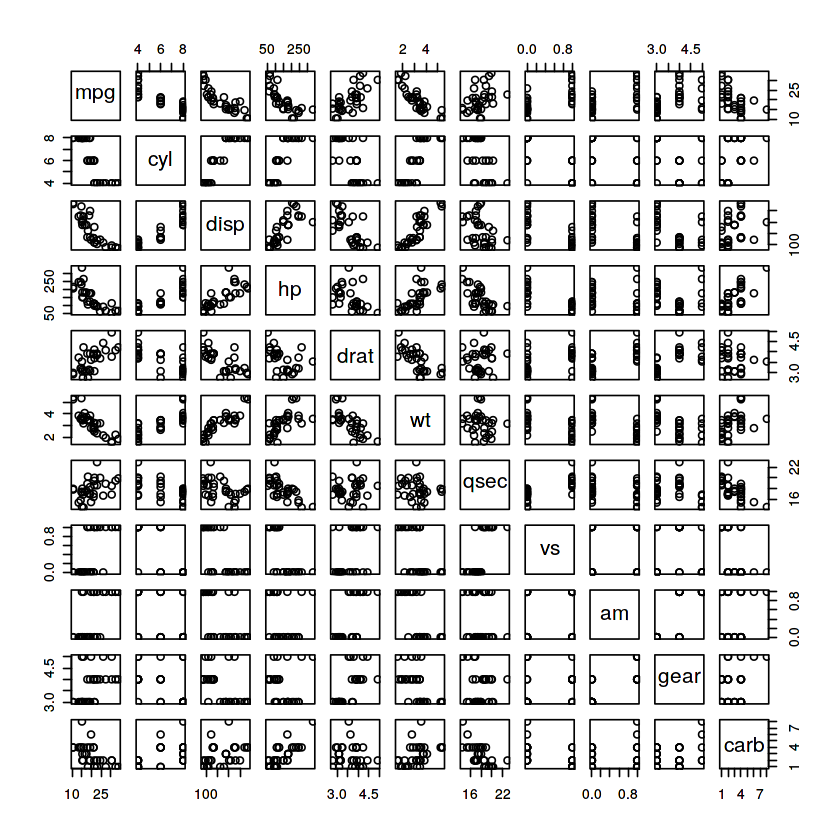

In [1]:
pairs(mtcars)

The data set examines 32 models of car from the 1970's and makes observations on 11 variables: Miles per gallon, number of engine cylinders, displacement, horsepower, axle ratio, weight, 1/4 mile time, type of engine (V or S(traight)), type of transmission, number of gears, and number of carburetors. For each pair of variables, the code gives a correlation plot; for instance, the (1,4) entry shows the relationship between horsepower and MPG. The code then displays all such graphs in a nice grid layout. Something you could learn from these plots is that higher horsepower is correlated with lower miles per gallon (read the (1,4) entry).

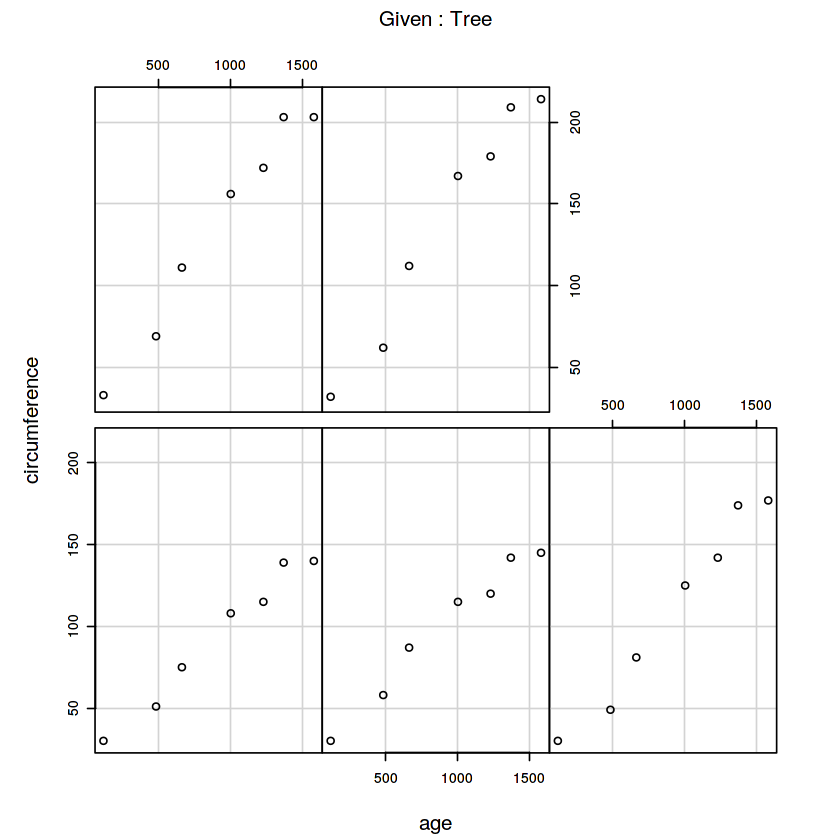

In [1]:
require(stats); require(graphics)
coplot(circumference ~ age | Tree, data = Orange, show.given = FALSE)

The "Orange" data set has data for 5 orange trees. The data set tracks the growth of the tree circumference over time, with seven sample points for each tree over a span of about 4.5 years. The age of the tree is measured in days since 12/31/1968, and the circumference is measured in millimeters (with the measurement being taken at chest height). The coplot function makes a plot for each tree, showing the correlation of height with age. The individual plots are then stacked next to each other. 

Something to learn from this data set is that trees get wider as they get older, and that this widening occurs fairly linearly.

,Brown,Blue,Hazel,Green
Black,68,20,15,5
Brown,119,84,54,29
Red,26,17,14,14
Blond,7,94,10,16


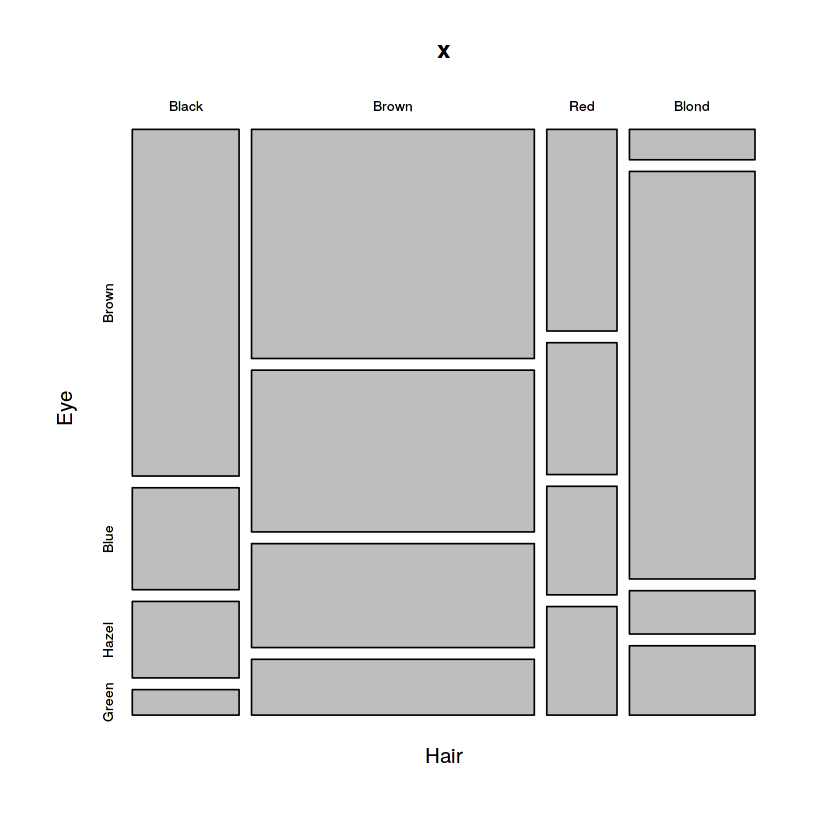

In [3]:
x <- apply(HairEyeColor, c(1, 2), sum)
x
mosaicplot(x)

The HairEyeColor data set is a data set consisting of observations on 592 students' hair color, eye color, and gender. The data is stored in a three dimensional array. It was originally aggregated over gender, but the male/female split was added in post for pedagogical reasons. The code is first re-aggregated the data over gender. Then the code is doing a mosiacplot, which can be read as follows. Let us examine the rectangle in the second column and fourth row. The width of this rectangle tells us that a large portion of the sample had brown hair. The height of this rectangle tells us that, amongst individuals with brown hair, a minority of them had green eyes. 

Something that you could learn from this data set is that a majority of the students that were surveyed had brown hair. 